<a href="https://colab.research.google.com/github/AayushmanGupta123/C-101-HW/blob/main/C_115_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data = files.upload()

Saving escape_velocity.csv to escape_velocity (1).csv


In [ ]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("escape_velocity.csv")
velocitylist = df["Velocity"].tolist()
escapelist  = df["Escaped"].tolist()
fig =px.scatter(x = velocitylist, y = escapelist)
fig.show()

In [ ]:
import numpy as np
velocityarray = np.array(velocitylist)
escapearray = np.array(escapelist)
m,c = np.polyfit(velocityarray,escapearray,1)
y = []
for x in velocityarray:
  yval = m*x+c
  y.append(yval)
fig = px.scatter(x = velocityarray, y = escapearray)
fig.update_layout(shapes = [dict(type = 'line',y0 = min(y),y1 = max(y),x0 = min(velocityarray),x1 = max(velocityarray))])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



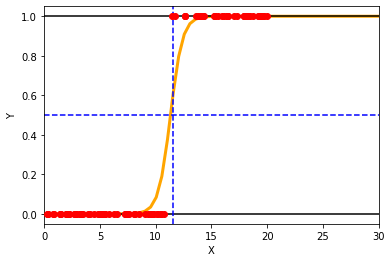

11.557788944723617


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = np.reshape(velocitylist,(len(velocitylist),1))
Y = np.reshape(escapelist,(len(escapelist),1))
lr = LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color = 'red',zorder = 20)
def model(x):
  return 1/(1+np.exp(-x))
xtest = np.linspace(0,100,200)
escapechance = model(xtest* lr.coef_ +lr.intercept_).ravel()
plt.plot(xtest,escapechance,color = 'orange',linewidth = 3)
plt.axhline(y = 0,color = 'k',linestyle = '-')
plt.axhline(y = 1,color = 'k',linestyle = '-')
plt.axhline(y = 0.5,color = 'b',linestyle = '--')
plt.axvline(x = xtest[23],color = 'b',linestyle = '--')
plt.ylabel('Y')
plt.xlabel('X')
plt.xlim(0,30)
plt.show()
print(xtest[23])

In [ ]:
velocity = float(input("Enter velocity: "))
chances = model(velocity*lr.coef_+lr.intercept_).ravel()[0]
if chances<=0.01:
  print("The Object Will Not Escape The Orbit")
elif chances>=1:
  print("The Object Will Escape The Orbit")
elif chances<0.5:
  print("The Object Might Not Escape The Orbit")
else:
  print("The Object Might Escape The Orbit")